### Goals
---
###### Import, analyze, clean, and preprocess a “real-world” classification dataset.
Select, design, and train a binary classification model of your choosing.
Optimize model training and input data to achieve desired model performance.

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import input dataset
charity_df = pd.read_csv('charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# check columns imported correctly
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [3]:
for column in charity_df.columns:
    print(f'Column {column} has {charity_df[column].isnull().sum()} null values.')

Column EIN has 0 null values.
Column NAME has 0 null values.
Column APPLICATION_TYPE has 0 null values.
Column AFFILIATION has 0 null values.
Column CLASSIFICATION has 0 null values.
Column USE_CASE has 0 null values.
Column ORGANIZATION has 0 null values.
Column STATUS has 0 null values.
Column INCOME_AMT has 0 null values.
Column SPECIAL_CONSIDERATIONS has 0 null values.
Column ASK_AMT has 0 null values.
Column IS_SUCCESSFUL has 0 null values.


In [4]:
print(f'Duplicate entries: {charity_df.duplicated().sum()}')

Duplicate entries: 0


In [5]:
# pre-processing first this time; get ready to encode:

# Generate categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()
loans_cat

NameError: name 'loans_df' is not defined

In [5]:
# Check the number of unique values in each column
loans_df[loans_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

###### 
Target data is the "Is_Successful" column; 1 = yes, 2 = no

Drop EIN & Name

Bin income amounts and ask amounts

In [6]:
charity_df.drop(columns=['NAME', 'EIN'], inplace=True)
charity_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
charity_df.shape

(34299, 10)

### Pre-process the data
##### - Bin
- Encode
- Standardize

In [8]:
# Check the unique value counts to see if binning is required
app_type_count = charity_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

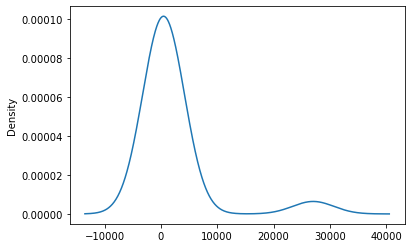

In [9]:
# see range & concentration of values
app_type_count.plot.density()

######  
will bin everything together that is less than 150

In [22]:
# binning values less than 150
app_type_bin = list(app_type_count[app_type_count < 150].index)

# replace the small outliers and place in "OTHER" categors
for i in app_type_bin:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(i, "OTHER")

charity_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
OTHER      120
Name: APPLICATION_TYPE, dtype: int64

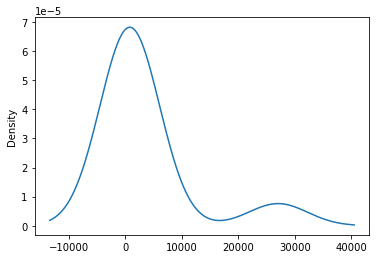

In [24]:
charity_df.APPLICATION_TYPE.value_counts().plot.density()

In [25]:
aff_type_count = charity_df.AFFILIATION.value_counts()
aff_type_count

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

Bin Family/Parent, National, Regional & Other together

In [26]:
# binning values less than 150
aff_type_bin = list(aff_type_count[aff_type_count < 100].index)

# replace the small outliers and place in "OTHER" categors
for i in aff_type_bin:
    charity_df.AFFILIATION = charity_df.AFFILIATION.replace(i, "OTHER")

charity_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
OTHER                 114
Name: AFFILIATION, dtype: int64

In [12]:
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C2570        1
C2380        1
C2190        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [16]:
a = charity_df.CLASSIFICATION.value_counts()

print(a)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C2570        1
C2380        1
C2190        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64


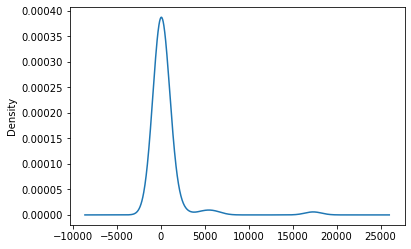

In [13]:
charity_df.CLASSIFICATION.value_counts().plot.density()

In [11]:
charity_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64